In [34]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Standard Units

In [38]:
exams = Table.read_table('data/exams_fa18.csv')
exams.sort('Midterm', descending = True)

Midterm,Final
91,88
91,90
91,91
91,87.5
91,87.5
91,94.5
91,90.5
91,97
91,85
91,95.5


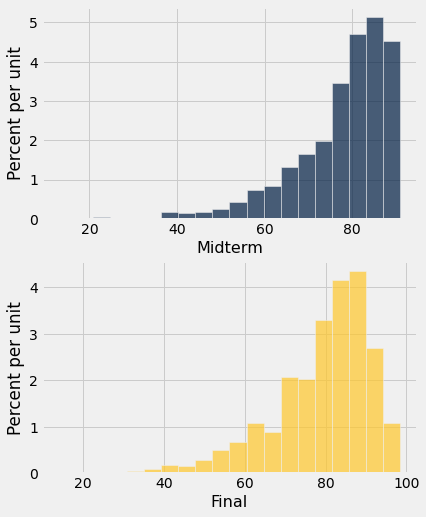

In [36]:
exams.hist(overlay=False, bins=20)

In [39]:
def standard_units(x):
    """Convert array x to standard units."""
    return (x - np.average(x)) / np.std(x)

In [40]:
midterm_su = standard_units(exams.column('Midterm'))
exams = exams.with_column('Midterm in Standard Units', midterm_su)

final_su = standard_units(exams.column('Final'))
exams = exams.with_column('Final in Standard Units', final_su)

exams.show(20)

Midterm,Final,Midterm in Standard Units,Final in Standard Units
91,88,1.16278,0.717241
89.5,84,1.03032,0.390935
78,71.5,0.0147889,-0.628768
87,88,0.809552,0.717241
72,72.5,-0.515053,-0.547191
71.5,61,-0.559206,-1.48532
82,92.5,0.368017,1.08433
84.5,87,0.588784,0.635664
85,92,0.632938,1.04355
78,71,0.0147889,-0.669556


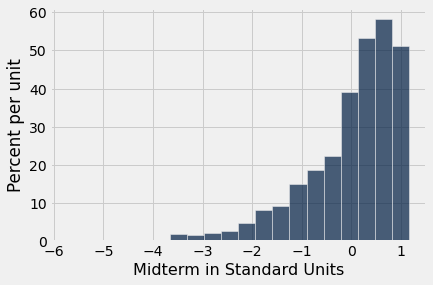

In [6]:
exams.hist('Midterm in Standard Units', bins=20)

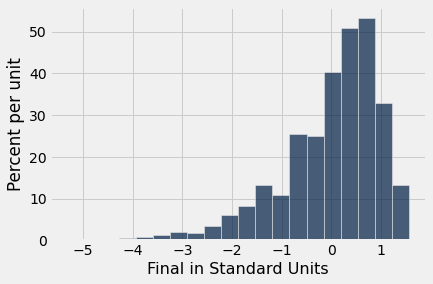

In [7]:
exams.hist('Final in Standard Units', bins=20)

## Central Limit Theorem ##

In [43]:
united = Table.read_table('data/united.csv') # change file path name to data/united.csv
united_bins = np.arange(-20, 300, 10) # (-20, -10, 0, 10,...300)
united.sort('Delay', descending = True)

Date,Flight Number,Destination,Delay
6/21/15,1964,SEA,580
6/22/15,300,HNL,537
6/21/15,1149,IAD,508
6/20/15,353,ORD,505
8/23/15,1589,ORD,458
7/23/15,1960,LAX,438
6/23/15,1606,ORD,430
6/4/15,1743,LAX,408
6/17/15,1122,HNL,405
7/27/15,572,ORD,385


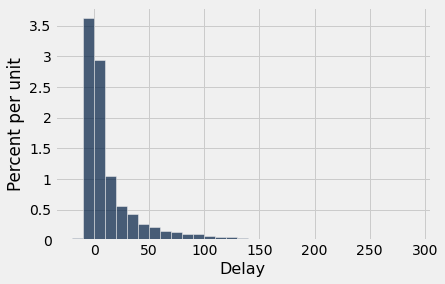

In [41]:
united.hist('Delay', bins=united_bins)

In [ ]:
# notice above, this is not a normal distribution
# most of the flight delays were short, with some 
# being a little longer

In [10]:
delays = united.column('Delay')
delay_mean = np.mean(delays)
delay_sd = np.std(delays)
delay_mean, delay_sd

(16.658155515370705, 39.480199851609314)

In [44]:
#The average flight delay in my united table (population distribution)
# is 16.66 minutes late.
# With a standard deviation of 39.48 minutes.

# Just by visually inspecting our distribution above, average +- 1 SD
# accounts for the majority of our distribution
# Most of our flights were between 22 minutes early and 56 minutes late.
(delay_mean-2*delay_sd, delay_mean+2*delay_sd)

(-62.30224418784792, 95.61855521858934)

In [45]:
my_small_set = make_array(1,2,3)

In [47]:
my_small_set_average = np.average(my_small_set)
my_small_set_average

2.0

In [53]:
my_small_set_distance = my_small_set - my_small_set_average
my_small_set_distance_squared = my_small_set_distance ** 2
my_small_set_distance_squared_average = np.average(my_small_set_distance_squared)
np.sqrt(my_small_set_distance_squared_average)

0.816496580927726

In [54]:
np.std(my_small_set)

0.816496580927726

In [11]:
percentile(50, delays)

2

In [55]:
def one_sample_mean(sample_size):
    """ Takes a sample from the population of flights and computes its mean"""
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [56]:
one_sample_mean(100)

17.62

In [14]:
def ten_thousand_sample_means(sample_size):
    """ repeating one_sample_mean 10,000 times, we get 10,000 different samples of 
    given sample size """
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

In [15]:
sample_means_100 = ten_thousand_sample_means(100)

In [16]:
sample_means_100

array([27.96, 16.19, 13.65, ..., 15.1 , 22.6 , 20.52])

In [17]:
len(sample_means_100)


10000

Population Average: 16.658155515370705


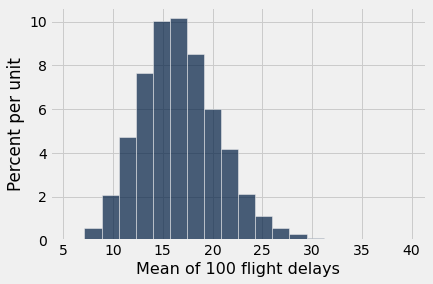

In [18]:
Table().with_column('Mean of 100 flight delays', sample_means_100).hist(bins=20)

print('Population Average:', delay_mean)

Population Average: 16.658155515370705


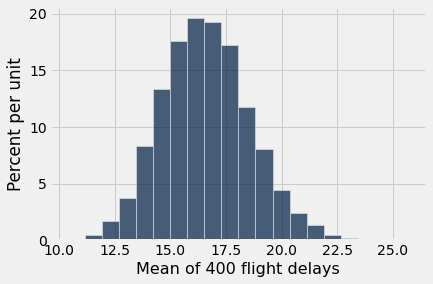

In [19]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column('Mean of 400 flight delays', sample_means_400).hist(bins=20)
print('Population Average:', delay_mean)

In [ ]:
# does the shape above look familiar?


In [20]:
sample_means_900 = ten_thousand_sample_means(900)

## Distribution of the Sample Average

In [21]:
means_tbl = Table().with_columns(
    '400', sample_means_400,
    '900', sample_means_900,
)
means_tbl

400,900
16.31,17.8411
14.805,18.7267
16.7225,16.9067
15.695,16.6911
15.825,16.45
16.525,19.5489
17.29,15.9178
18.5975,18.4767
16.03,15.6156
16.0675,17.9422


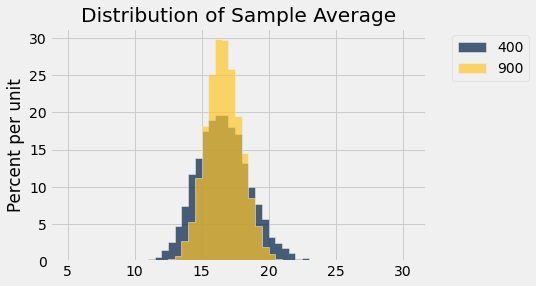

In [22]:
means_tbl.hist(bins = np.arange(5, 31, 0.5))
plots.title('Distribution of Sample Average');

In [ ]:
# how would you interpret these two distributions above?
# what does it tell you about the effect of increasing the sample size?

# write 1-2 sentences here:


In [33]:
np.mean(united.column('Delay'))

16.658155515370705

In [ ]:
# what does it mean that the distribution of the sample average
# is centered at 16.65?



In [23]:
united.num_rows

13825

In [24]:
# How many possible sample means are there?
united.num_rows ** 400

1845253300060122534684058597421182951017338738756884128476156537109395559702295050837795610986469015706417701209704203890696502616877632733167737247128710898267622177602279004150237321497531712957437744194467949953310673085563343687922543234838511385550568262088418334016217887061735745358842456577208939555740404373614633941136938352510678553686140728842897559436843191863609514780562396147921834537075860636817493656816017587537752125750151805566479543166742758254440594398100342650860455445795087942680221047750947255562969782801791748639952850756659518870235020316513575934561122027710440608023538776721761349403194150575014182981349346980577699633375066811153948871815566280319121565243984196831524157664160526536071758298269096548661601001356951548310460921171197940711389849058290284443729287317331793254191518876765178731748453564076631795997590039640387156475975294002056115371653663653810384491550154761367793765502453546587829476276348569091617961438914859251316410793595152416543512156519

Far too many samples to enumerate them all! So while there is a well-defined distribution given by all possible sample means from all samples, it is too hard to compute it exactly. Instead we approximate this distribution by drawing 10,000 samples from it and drawing the histogram.

## Variability of the Distribution

In [25]:
delay_mean = np.mean(united.column('Delay'))
delay_sd = np.std(united.column('Delay'))
delay_mean, delay_sd

(16.658155515370705, 39.480199851609314)

In [26]:
"""Empirical distribution of random sample means"""

def plot_and_summarize_sample_means(sample_size):
    sample_means = ten_thousand_sample_means(sample_size)
    sample_means_tbl = Table().with_column('Sample Means', sample_means)
    
    # Print some information about the distribution of the sample means
    print("Sample size: ", sample_size)
    print("Population mean:", delay_mean)
    print("Average of sample means: ", np.mean(sample_means))
    print("Population SD:", delay_sd)
    print("SD of sample means:", np.std(sample_means))

    # Plot a histogram of the sample means
    sample_means_tbl.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))

In [ ]:
# We looked at two distributions of different sample sizes above
# what do you think will happen when we look at a distribution
# of sample size 100?

# will it be wider? narrower?

Sample size:  100
Population mean: 16.658155515370705
Average of sample means:  16.653013
Population SD: 39.480199851609314
SD of sample means: 3.9738379976832223


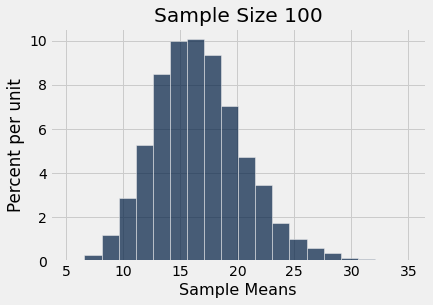

In [27]:
plot_and_summarize_sample_means(100)

In [28]:
# Ratio
# Population SD / SD of Sample Means
39.48 / 3.932

10.040691759918616

Sample size:  400
Population mean: 16.658155515370705
Average of sample means:  16.63101925
Population SD: 39.480199851609314
SD of sample means: 1.9744365001195752


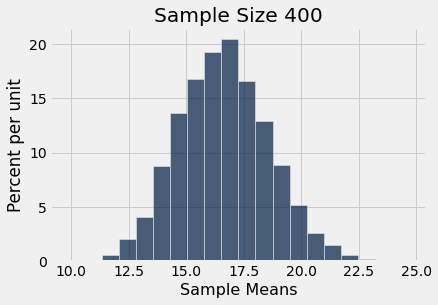

In [29]:
plot_and_summarize_sample_means(400)

In [30]:
# Ratio
# Population SD / SD of Sample Means
39.48 / 1.973

20.010136847440442

Sample size:  625
Population mean: 16.658155515370705
Average of sample means:  16.661071520000004
Population SD: 39.480199851609314
SD of sample means: 1.5857449208460008


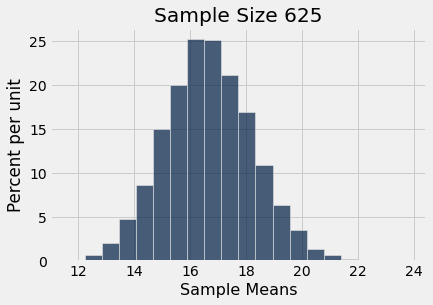

In [31]:
plot_and_summarize_sample_means(625)

In [32]:
# Ratio
# Population SD / SD of Sample Means
39.48 / 1.577

25.034876347495242

In [ ]:
# what do you notice about the ratio of Population SD / SD of Sample Means, as sample size
# increases?


# why do you think that pattern occurs?

# what does the SD of Sample Means tell us?

